### Importing 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Loading Dataset

In [2]:
df = pd.read_csv('/content/Unemployment in India.csv')

### Checking dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [4]:
# Displaying labels
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [5]:
# No of rows and columns
df.shape

(768, 7)

In [6]:
# Checking missing values
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [7]:
# Checking number of states in dataset
x = df['Region']
x.unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal', nan, 'Chandigarh'],
      dtype=object)

In [8]:
# Counting values of each region 
df.Region.value_counts()

Andhra Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Madhya Pradesh      28
Maharashtra         28
Karnataka           28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: Region, dtype: int64

In [9]:
# Number of states
no_of_states = x.nunique()
no_of_states

28

In [10]:
# Dropping null values
df = df.dropna()

In [11]:
# Checking null values
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [12]:
# Check unique values (frequency)
UniqueFrequency = df[' Frequency'].unique()
Totalfrequency = df[' Frequency'].nunique()

In [13]:
print("Unique frequencies: ", UniqueFrequency)
print("\nTotal frequencies: ", Totalfrequency)

Unique frequencies:  [' Monthly' 'Monthly']

Total frequencies:  2


In [14]:
# Check unique values in the column area
UniqueArea = df['Area'].unique()
TotalArea = df['Area'].nunique()

In [15]:
print("Unique Area: ", UniqueArea)
print("\nTotal Area: ", TotalArea)

Unique Area:  ['Rural' 'Urban']

Total Area:  2


### Visualization

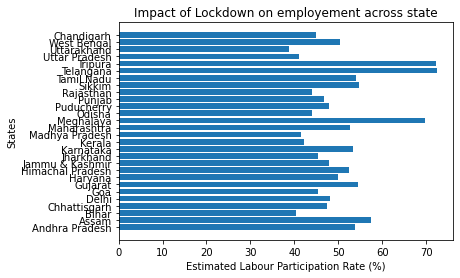

In [16]:
y = df['Region']

x = df[' Estimated Labour Participation Rate (%)']
plt.barh(y, x,)

# labels
plt.xlabel('Estimated Labour Participation Rate (%)')
plt.ylabel('States')
plt.title('Impact of Lockdown on employement across state')

plt.rcParams['figure.figsize'] = (20, 200.0)
plt.style.use('ggplot')

plt.show()

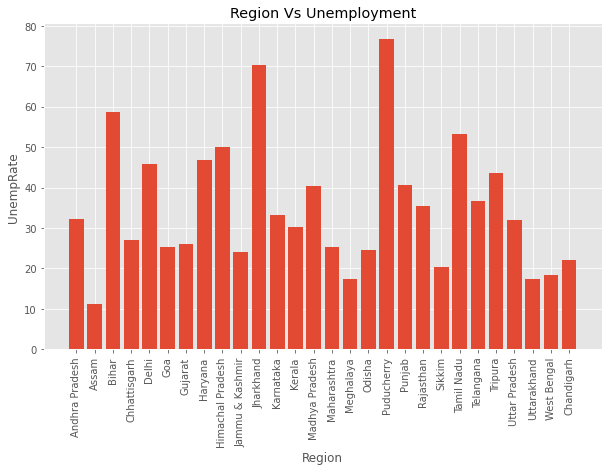

In [22]:
UnempRate = df[' Estimated Unemployment Rate (%)']
Region = df['Region']

# Plotting bar plot
plt.bar(Region, UnempRate)

# Add a title and axis labels
plt.title('Region Vs Unemployment')
plt.xlabel('Region')
plt.ylabel('UnempRate')

plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (6,6)


plt.show()

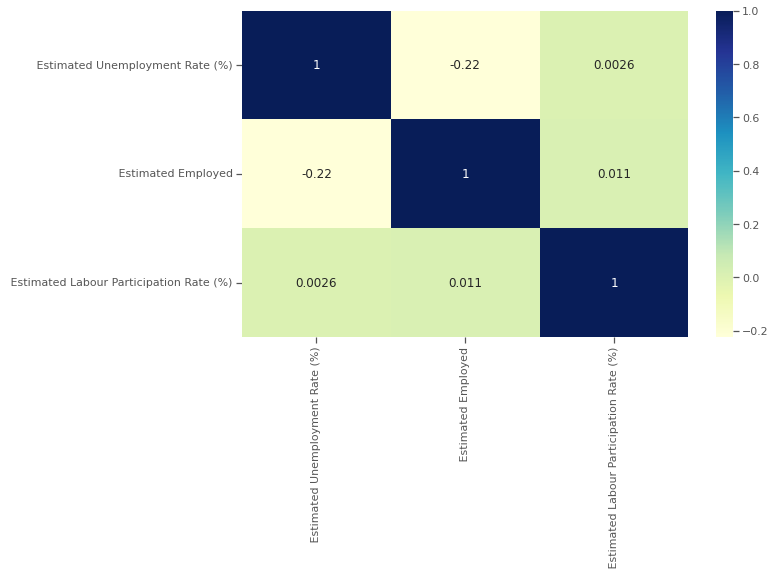

In [23]:
Heat_maps = df[['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area']]

Heat_maps = Heat_maps.corr()

plt.figure(figsize=(10,6))
sns.set_context('notebook', font_scale=1)
sns.heatmap(Heat_maps, annot=True, cmap="YlGnBu");

In [24]:
# Top estimated employed Regions
Make_total = df.pivot_table(' Estimated Employed',index=['Region'],aggfunc='mean')
Topstate = Make_total.sort_values(by=' Estimated Employed',ascending=False)[:47]
print("Top estimated employed Regions By region :\n\n", Topstate)


Top estimated employed Regions By region :

                    Estimated Employed
Region                               
Uttar Pradesh            2.809483e+07
Maharashtra              1.999020e+07
West Bengal              1.719854e+07
Bihar                    1.236619e+07
Tamil Nadu               1.226955e+07
Gujarat                  1.140201e+07
Madhya Pradesh           1.111548e+07
Karnataka                1.066712e+07
Rajasthan                1.004106e+07
Andhra Pradesh           8.154093e+06
Telangana                7.939663e+06
Odisha                   6.545747e+06
Assam                    5.354772e+06
Punjab                   4.539362e+06
Jharkhand                4.469240e+06
Kerala                   4.425900e+06
Chhattisgarh             4.303499e+06
Haryana                  3.557072e+06
Delhi                    2.627513e+06
Jammu & Kashmir          1.799932e+06
Uttarakhand              1.390228e+06
Himachal Pradesh         1.059824e+06
Tripura                  7.170026e+05
Megha

[Text(0, 0, 'Andhra Pradesh'),
 Text(1, 0, 'Assam'),
 Text(2, 0, 'Bihar'),
 Text(3, 0, 'Chhattisgarh'),
 Text(4, 0, 'Delhi'),
 Text(5, 0, 'Goa'),
 Text(6, 0, 'Gujarat'),
 Text(7, 0, 'Haryana'),
 Text(8, 0, 'Himachal Pradesh'),
 Text(9, 0, 'Jammu & Kashmir'),
 Text(10, 0, 'Jharkhand'),
 Text(11, 0, 'Karnataka'),
 Text(12, 0, 'Kerala'),
 Text(13, 0, 'Madhya Pradesh'),
 Text(14, 0, 'Maharashtra'),
 Text(15, 0, 'Meghalaya'),
 Text(16, 0, 'Odisha'),
 Text(17, 0, 'Puducherry'),
 Text(18, 0, 'Punjab'),
 Text(19, 0, 'Rajasthan'),
 Text(20, 0, 'Sikkim'),
 Text(21, 0, 'Tamil Nadu'),
 Text(22, 0, 'Telangana'),
 Text(23, 0, 'Tripura'),
 Text(24, 0, 'Uttar Pradesh'),
 Text(25, 0, 'Uttarakhand'),
 Text(26, 0, 'West Bengal'),
 Text(27, 0, 'Chandigarh')]

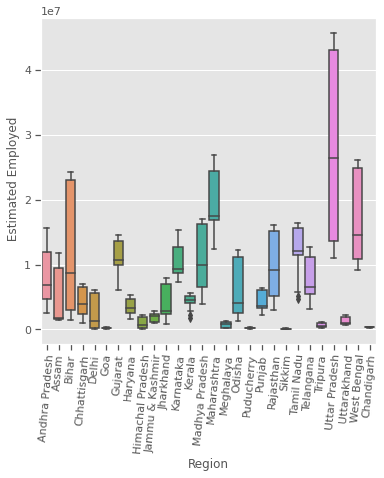

In [25]:
g = sns.boxplot(data=df, x='Region', y=' Estimated Employed')
g.set_xticklabels(g.get_xticklabels(), rotation=85)

In [27]:
# Sorting 
Make_total = df.pivot_table(' Estimated Unemployment Rate (%)',index=['Region'],aggfunc='mean')
Topstate = Make_total.sort_values(by=' Estimated Unemployment Rate (%)',ascending=False)[:47]
print("Top estimated unemployed Regions By region :\n\n",Topstate)

Top estimated unemployed Regions By region :

                    Estimated Unemployment Rate (%)
Region                                            
Tripura                                  28.350357
Haryana                                  26.283214
Jharkhand                                20.585000
Bihar                                    18.918214
Himachal Pradesh                         18.540357
Delhi                                    16.495357
Jammu & Kashmir                          16.188571
Chandigarh                               15.991667
Rajasthan                                14.058214
Uttar Pradesh                            12.551429
Punjab                                   12.031071
Puducherry                               10.215000
Kerala                                   10.123929
Tamil Nadu                                9.284286
Goa                                       9.274167
Chhattisgarh                              9.240357
West Bengal                        

[Text(0, 0, 'Andhra Pradesh'),
 Text(1, 0, 'Assam'),
 Text(2, 0, 'Bihar'),
 Text(3, 0, 'Chhattisgarh'),
 Text(4, 0, 'Delhi'),
 Text(5, 0, 'Goa'),
 Text(6, 0, 'Gujarat'),
 Text(7, 0, 'Haryana'),
 Text(8, 0, 'Himachal Pradesh'),
 Text(9, 0, 'Jammu & Kashmir'),
 Text(10, 0, 'Jharkhand'),
 Text(11, 0, 'Karnataka'),
 Text(12, 0, 'Kerala'),
 Text(13, 0, 'Madhya Pradesh'),
 Text(14, 0, 'Maharashtra'),
 Text(15, 0, 'Meghalaya'),
 Text(16, 0, 'Odisha'),
 Text(17, 0, 'Puducherry'),
 Text(18, 0, 'Punjab'),
 Text(19, 0, 'Rajasthan'),
 Text(20, 0, 'Sikkim'),
 Text(21, 0, 'Tamil Nadu'),
 Text(22, 0, 'Telangana'),
 Text(23, 0, 'Tripura'),
 Text(24, 0, 'Uttar Pradesh'),
 Text(25, 0, 'Uttarakhand'),
 Text(26, 0, 'West Bengal'),
 Text(27, 0, 'Chandigarh')]

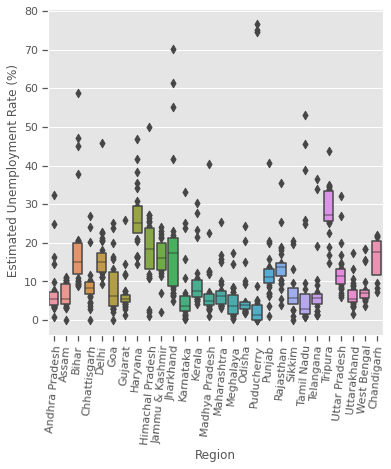

In [30]:
g=sns.boxenplot(data=df, x='Region', y=' Estimated Unemployment Rate (%)')
g.set_xticklabels(g.get_xticklabels(), rotation=85)

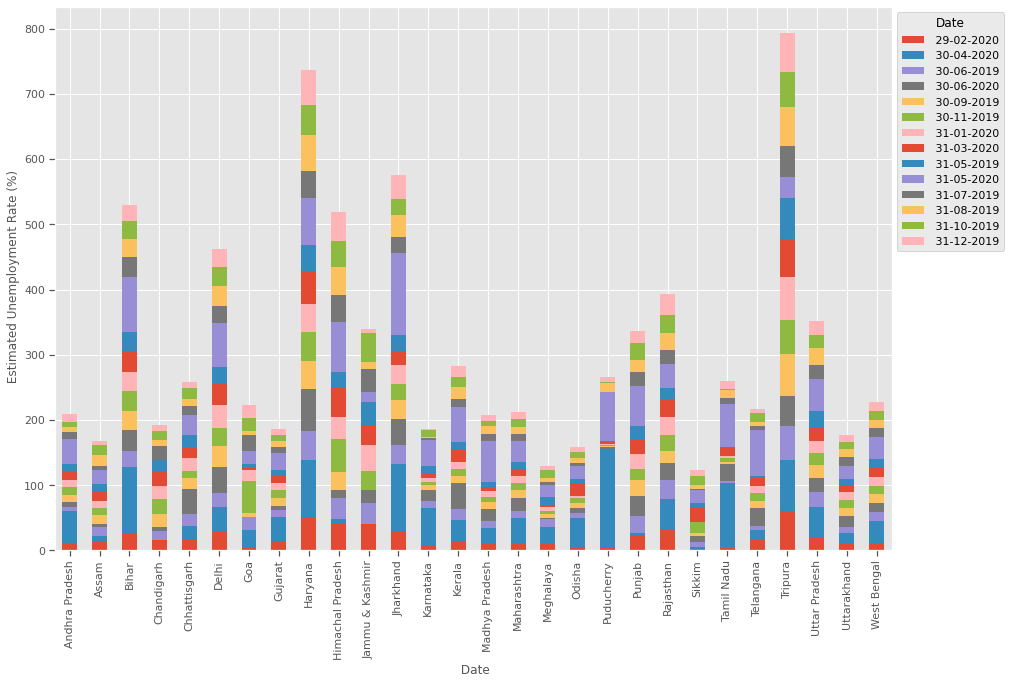

In [35]:
# Group data by region and date
group_df = df.groupby(["Region", " Date"]).sum()

# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(15,10))
group_df[" Estimated Unemployment Rate (%)"].unstack().plot.bar(stacked=True, ax=ax)

# Labeling
ax.set_ylabel(" Estimated Unemployment Rate (%)")
ax.set_xlabel(" Date")

# Arrange legend to the right top corner
ax.legend(title="Date", loc='upper left', bbox_to_anchor=(1,1))

# PLotting
plt.show()